# **Respuestas del task 2.3**

Para este ejercicio hay 2 archivos distintos. El primero es el archivo task2_3.py y el otro es task2_3_fix.py. En ambos archivos se decidió usar la función de classification_report de la librería sklearn.etricas, para utilizar las métricas de precision, recall y f1-score, los estándares para evaluar la efectividad de un modelo. Podemos usar el recall ya que, aunque no lo solicitara el ejercicio se balancearon los datos y se hizo la partición de 80% training y 20% testing. 

El primer archivo mencionado es un archivo de prueba, donde quisimos experimentar que pasaría con un perceptrón al cuál se le dan 2 features y no se modifica la columna objetivo.

Los resultados tienen bastantes problemas, tanto en las métricas como en la gráfica (task2_3.py). Esto se debe principalmente a que la columna objetivo de clasificación tienen más de 2 valores. El dataset tiene 3 tipos de flores: setosa, versicolor y virginica. Esto supone un gran problema, ya que un preceptrón es un clasificador binario, pero con el dataset intentamos clasificar los registros entre 3 clases distintas. Por eso es que hay 3 tipos de puntos distintos en la gráfica y 3 clases en las métricas (0, 1, y 2). La clase 2 tiene un 0 en todas las métricas, ya que el perceptrón de una sola capa no está diseñado para clasificaciones multiclase, por lo que no se pudo clasificar correctamente nada de la tercera clase. 

Es por eso que tenemos un archivo extra donde realizamos correctamente la selección de la columna objetivo y limitamos para que solo sean 2 clases en las cuales se vaya a clasificar la información. Estos fueron los resultados del archivo task_2_3_fix.py, donde se filtra para utilizar únicamente 2 clases.



In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
X_selected = iris.data[:, [0, 1]]  # seleccionar columnas especificas
y = iris.target

# Filtrar para usar solo 2 clases
X_filtered = X_selected[y != 2]
y_filtered = y[y != 2]

In [4]:
trainingX, testX, trainY, testY = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

In [5]:
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron.fit(trainingX, trainY)

predictions = perceptron.predict(testX)
results = classification_report(testY, predictions)
print(results)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



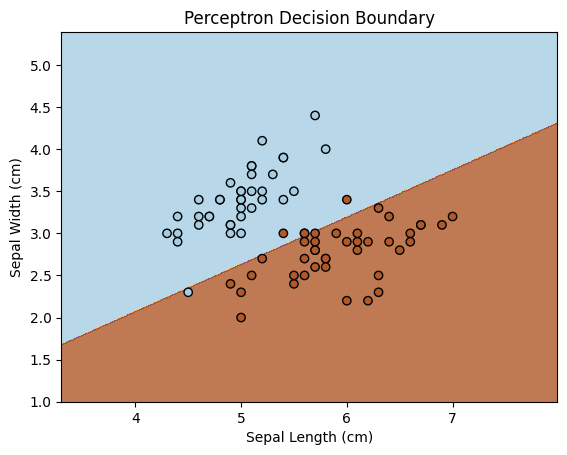

In [6]:
x_min, x_max = trainingX[:, 0].min() - 1, trainingX[:, 0].max() + 1
y_min, y_max = trainingX[:, 1].min() - 1, trainingX[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                np.arange(y_min, y_max, 0.01))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# grafica
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(trainingX[:, 0], trainingX[:, 1], c=trainY, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Perceptron Decision Boundary')
plt.show()